In [32]:
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

# Info from BAM mappings.
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']

In [2]:
# Average = 3 reads / 30 bases
# 5000 people
poisson.ppf(np.exp(np.log(.95)/5000), mu=1/10)
#poisson.cdf(mu=20,k=30)**50
# Using k-mers of 106, we have a 99.5 of the each kmer being correctly found (twice) in all samples

3.0

In [30]:
kmer_thresh = 110
avg_number_of_kmer = (150-kmer_thresh)/avg_dist_between_starts
poisson.sf(mu=, k=1)

SyntaxError: invalid syntax (<ipython-input-30-9a0dac34cb5e>, line 3)

In [91]:
import numpy as np
import pandas as pd
#from scipy.stats import expon
#from scipy.stats import poisson
#import seaborn as sns
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

# Info from BAM mappings.
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']


PARENT_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
ihart_flagstat_file = PARENT_DIR + 'data/ihart_flagstat.csv'
flagstat = pd.read_csv(ihart_flagstat_file, index_col=0)
flagstat = flagstat.loc[set(flagstat.index).intersection(bam_mappings.index)]
bam_mappings = bam_mappings.loc[flagstat.index]

kmer_length = 100
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)
avg_coverage = total_mapped_reads*150/(6.27e9*(bam_mappings.sex_numeric.astype(float)==1.0) + 6.37e9*(bam_mappings.sex_numeric.astype(float)==2.0))
avg_n_100mers = (150-kmer_length)/(150/avg_coverage)
kmer_depth_dict = {k:avg_n_100mers[k] for k in avg_n_100mers.keys()}


In [92]:
kmer_depth_dict

{'09C81595': 5.695093621364095,
 '11C121647': 5.596458334981804,
 '05C40733': 5.451475757261696,
 '05C46571': 5.632874559332661,
 '04C27446': 6.630526143798881,
 '05C44411': 5.593292077129175,
 '07C62635': 6.737242466350571,
 '08C78102': 5.716999204267503,
 '04C33633': 5.551154357778471,
 '05C40755': 5.768820587678008,
 'HI1146': 5.420702402572014,
 '03C16551': 5.095648345905892,
 '05C43257': 5.464955338928574,
 '05C45464': 6.23033664904158,
 '07C66922': 6.081153976874961,
 '07C62325-2': 5.705881793359755,
 '09C98377': 6.372336838742932,
 '07C62636': 5.314139783869207,
 '04C34144': 6.995115186136382,
 '11C121920': 4.902195359626007,
 '10C103958': 5.506531465377828,
 '05C50276': 5.508799793665221,
 '07C63797': 4.7768226338685995,
 '03C18907': 6.973008910381655,
 '03C17212': 5.299638532704879,
 '05C45650': 4.755178719168427,
 '05C39048': 4.872054763960361,
 '03C16053': 5.333549747122049,
 '07C62579': 5.154845076779923,
 '10C113182': 6.5284594086978105,
 '10C114756': 5.720474469305217,
 '

In [88]:
kmer_length = 100
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)
avg_coverage = total_mapped_reads*150/(6.27e9)#*(bam_mappings.sex_numeric.astype(float)==1.0) + 6.37e9*(bam_mappings.sex_numeric.astype(float)==2.0))
avg_n_100mers = (150-kmer_length)/(150/avg_coverage)
kmer_depth_dict = {k:avg_n_100mers[k] for k in avg_n_100mers.keys()}


In [90]:
kmer_depth_dict

{'09C81595': 5.695093621364095,
 '11C121647': 5.6857160436736995,
 '05C46571': 5.722713069050886,
 '05C40733': 5.451475757261696,
 '04C27446': 6.736276162041288,
 '05C44411': 5.593292077129175,
 '07C62635': 6.737242466350571,
 '08C78102': 5.716999204267503,
 '04C33633': 5.551154357778471,
 '05C40755': 5.860827295615457,
 'HI1146': 5.420702402572014,
 '03C16551': 5.095648345905892,
 '05C43257': 5.55211571116029,
 '05C45464': 6.329704059712099,
 '07C66922': 6.081153976874961,
 '07C62325-2': 5.705881793359755,
 '09C98377': 6.372336838742932,
 '07C62636': 5.314139783869207,
 '04C34144': 6.995115186136382,
 '11C121920': 4.902195359626007,
 '10C103958': 5.594354933725163,
 '05C50276': 5.596659439497202,
 '07C63797': 4.853008002829822,
 '03C18907': 6.973008910381655,
 '03C17212': 5.3841622732583865,
 '05C45650': 4.831018890128052,
 '05C39048': 4.9497589866710525,
 '03C16053': 5.333549747122049,
 '07C62579': 5.154845076779923,
 '10C113182': 6.5284594086978105,
 '05C47105': 5.741774605027174,
 

In [78]:
{i:j for i,j in avg_n_100mers.}

TypeError: 'float' object is not iterable

In [25]:
2*3e9/np.median(pd.read_csv(ihart_flagstat_file)['ProperPair'])

7.404634920121298

In [26]:
avg_dist_between_starts = 150/20 #2*3e9/np.median(pd.read_csv(ihart_flagstat_file)['ProperPair'])

kmer_thresh = 100
avg_number_of_kmer = (150-kmer_thresh)/avg_dist_between_starts
print(avg_number_of_kmer)
(poisson.sf(mu=avg_number_of_kmer, k=2))#**50

6.666666666666667


0.9619623897155102

In [16]:
avg_number_of_kmer

4.051516425

In [41]:
50/avg_dist_between_starts

0.9999999999999792

In [165]:
df = pd.DataFrame([(k,n_thresh, 100*(1-(poisson.sf(mu=n_thresh*avg_dist_between_reads,k=(150-k)))**50)) for k in range(75,125) for n_thresh in range(5,15)])
df.columns = ['k', 'n_thresh', 'prob']


<AxesSubplot:xlabel='k', ylabel='prob'>

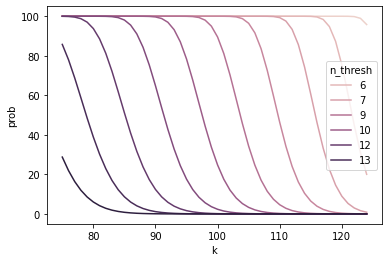

In [166]:
sns.lineplot(data=df, x='k', y='prob', hue='n_thresh')

In [114]:
poisson.sf(mu=10,k=100)

3.62000158092323e-20